# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [28]:
kart = pd.read_csv("Superkart.csv")

In [29]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [30]:
# Check the head of the data
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [31]:
# Check the tail of the data
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Understand the shape of the dataset**

In [32]:
# Check the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


### **Check the data types of the columns for the dataset**

In [33]:
# Check for information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


### **Checking for missing values in the dataset** ###

In [34]:
# Check for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observations:**
*There is no missing values in data.*

In [35]:
# Check for duplicate values
data.duplicated().sum()

0

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [36]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
* There are 16 different product types and fruits and vegetables have been sold highest number of times (1249).
* There are 4 unique stores in the data.
* The revenue generated from the sale of a particular product at a certain outlet varies from 33 to 8000 with 50% of the values lying above 2762.
* The mean store sales are approximately 3464 and the median of the store sales is approximately 3452.This shows that the "Product_Store_Sales_Total" is skewed towards the right side.

#### Let's check the count of each unique category in each of the categorical variables

In [37]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Product_Id
FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: count, Length: 8763, dtype: int64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
O

**Observations:**
* In the "Product_Sugar_Content" column, Regular and reg belongs to came category.
* Products with low sugar are more compared to Regular and No sugar together.

In [38]:
# Replacing reg category with Regular in Product_Sugar_Content feature
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [39]:
# Print the value counts for each class in Product_Sugar_Content feature
data.Product_Sugar_Content.value_counts()

Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

**Observation:**
* Under "Product_Sugar_Content" Regular has replaced reg and their values have added.

In [40]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [19]:
data["Product_Id_char"].unique() # Fill the blank to get all unique elements in Product_Id_char

array(['FD', 'NC', 'DR'], dtype=object)

In [20]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [21]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [22]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [41]:
## Drop the Product_Id column. Hint: use inplace = True and axis = 1
data = data.drop(["Product_Id"], axis = 1)

In [42]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [43]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

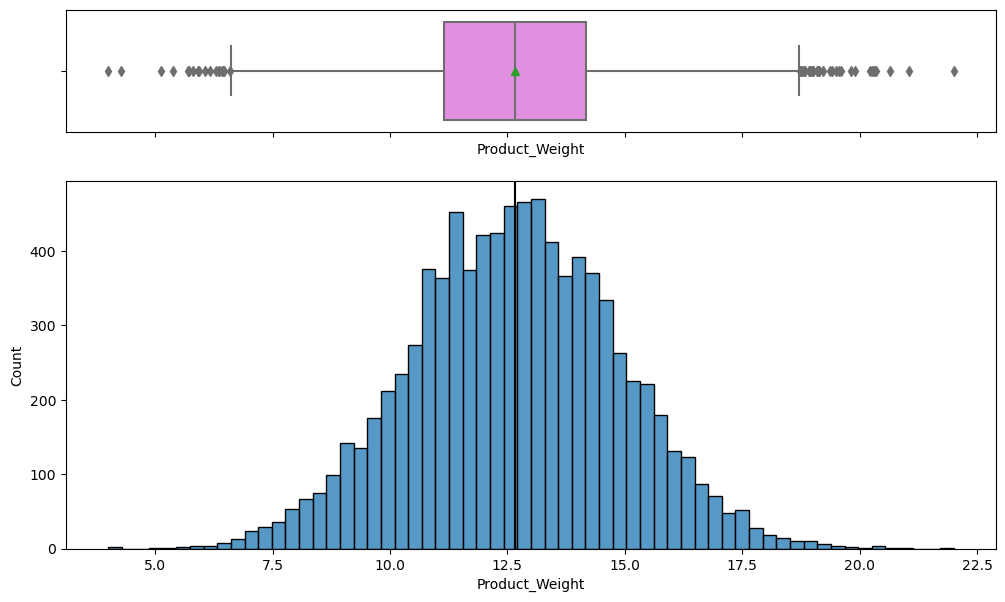

In [44]:
histogram_boxplot(data, "Product_Weight")

**Observation:**
* The product weight is uniformly distributed with mean and median lying around 12.5.

**Product_Allocated_Area**

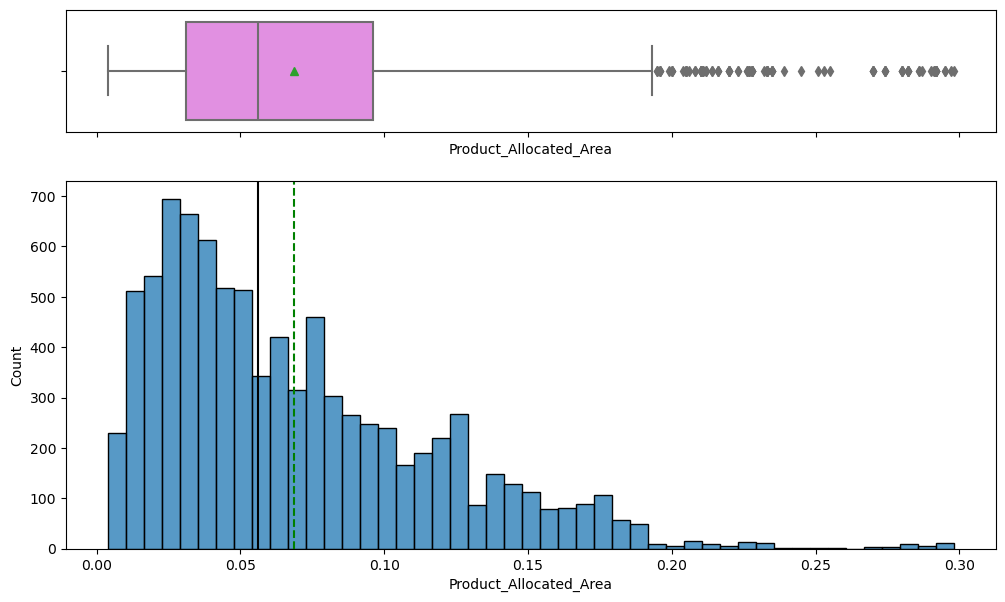

In [45]:
# Plot the histogram and the boxplot for 'Product_Allocated_Area'
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:**
* The distribution is right skewed with the median lying around 0.05.

**Product_MRP**

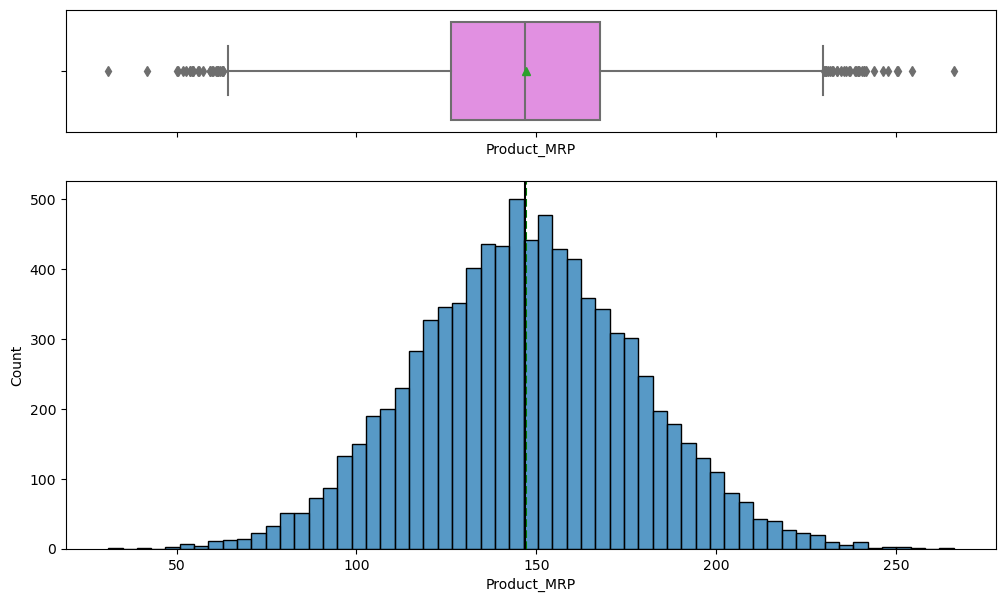

In [46]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data, "Product_MRP")

**Observation:**
* The product MRP is uniformly distributed with mean and median lying around 150.

**Product_Store_Sales_Total**

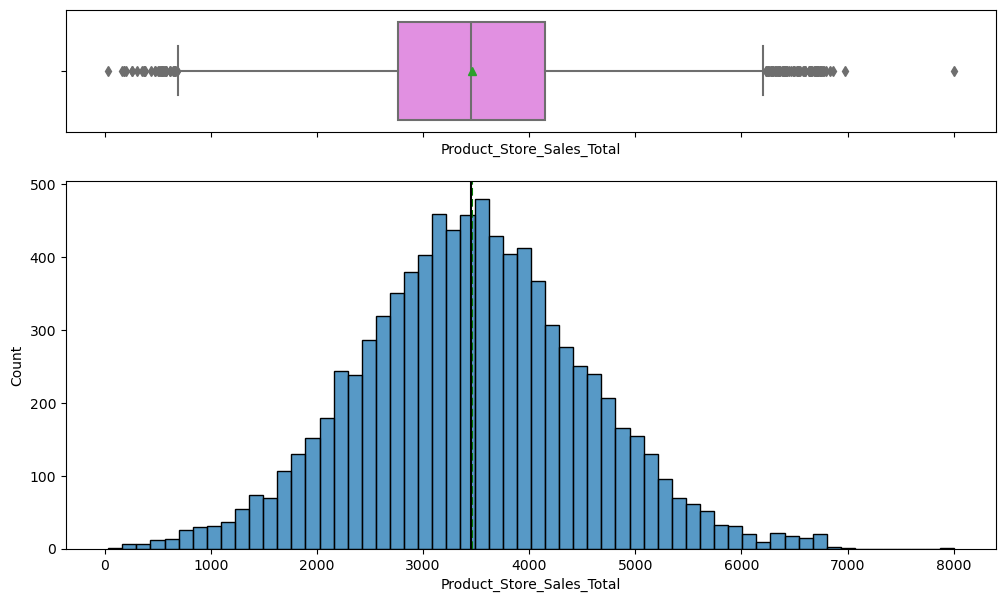

In [47]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
* The revenue generated from each product at a particular store is normally distributed with mean and median lying around 3500.

In [48]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

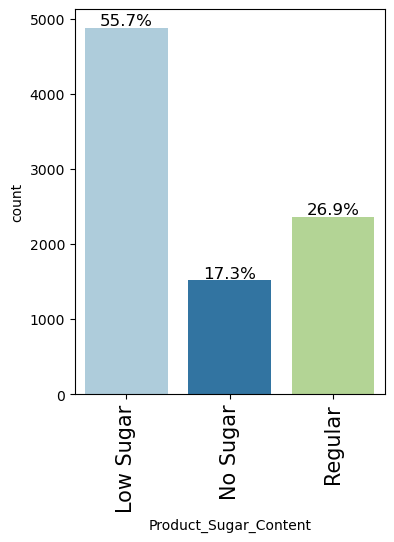

In [49]:
labeled_barplot(data, "Product_Sugar_Content", perc = True) # Plot for Product_Sugar_Content

**Observations:**
* Around 56% of people prefer Low Sugar followed by about 27% prefer Regular and around 17% prefer no sugar.


**Product_Type**

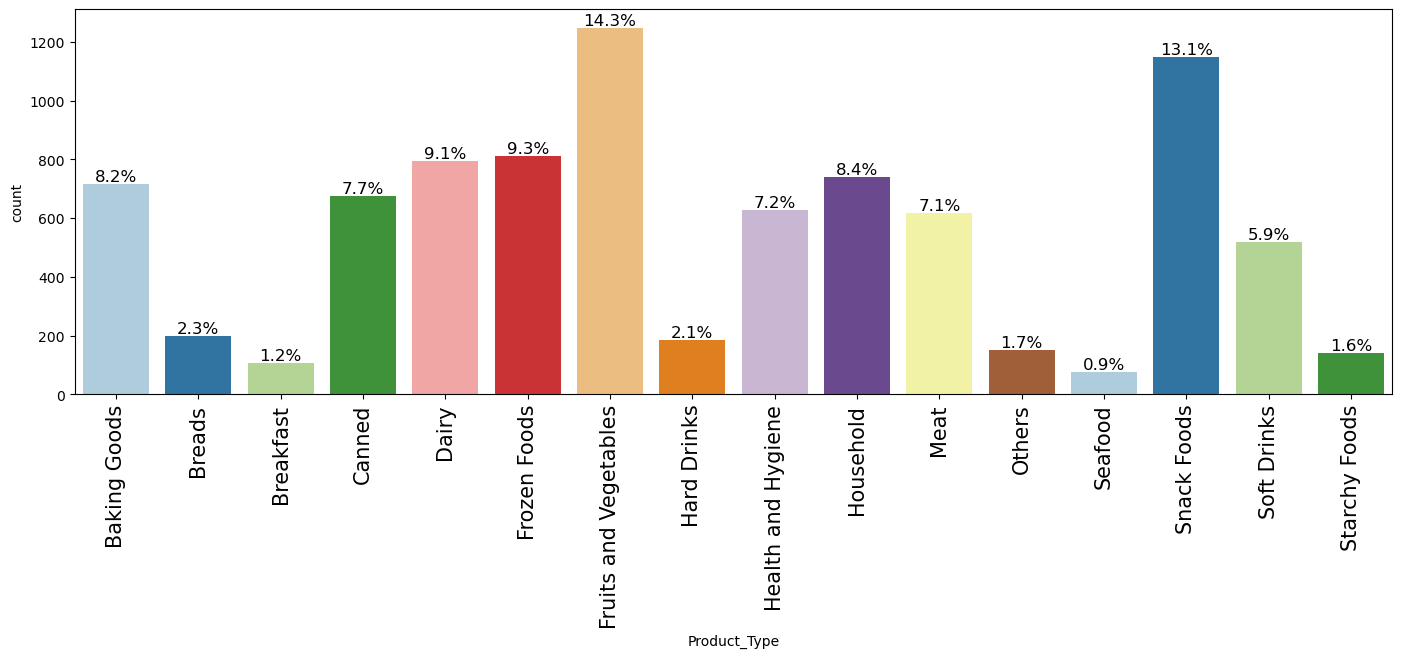

In [50]:
# Plot the labelled barplot for 'Product_Type'
labeled_barplot(data, "Product_Type", perc = True)

**Observations:**
* Fruits and vegetables (14%) and Snacks Foods (13%) have been bought the highest number of times.
* Seafood (1%) has been bought the lowest number of times.

**Store_Id**

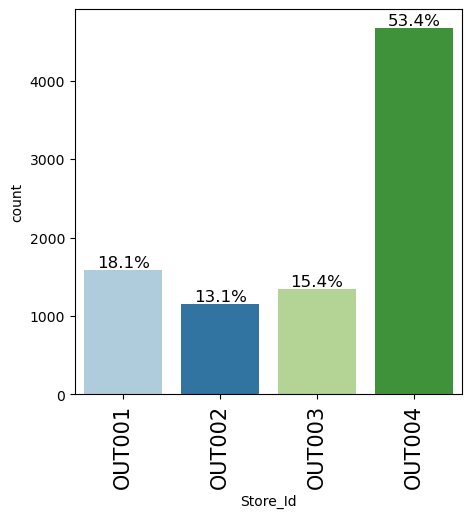

In [51]:
# Plot the labelled barplot for 'Store_Id'
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**
* Around 53% of the products are being sold from the OUT004. An almost equal number of products have been sold from the other three stores each.

**Store_Size**

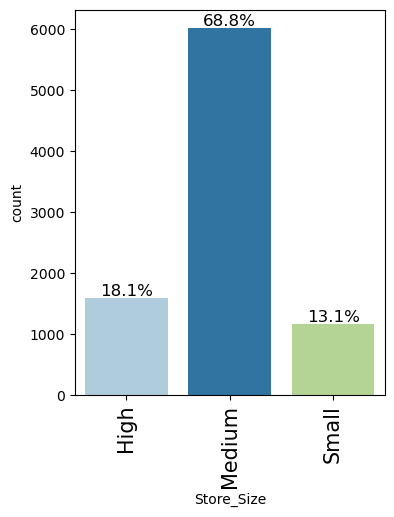

In [52]:
# Plot the labelled barplot for 'Store_Size'
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**
* Around 69% of the products have been sold from the stores which are medium in size.

**Store_Location_City_Type**

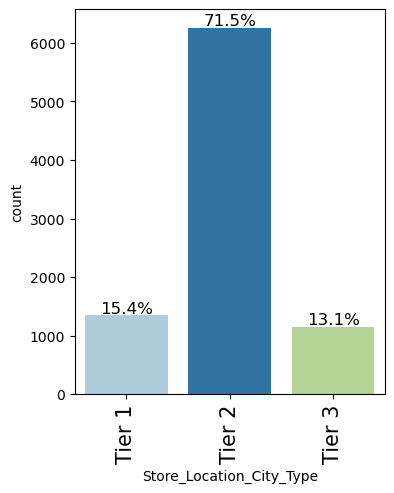

In [53]:
# Plot the labelled barplot for 'Store_Locatiom_City_Type'
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**
* Around 72% of the products have been sold from the store which are located in Tier 2 cities.

**Store_Type**

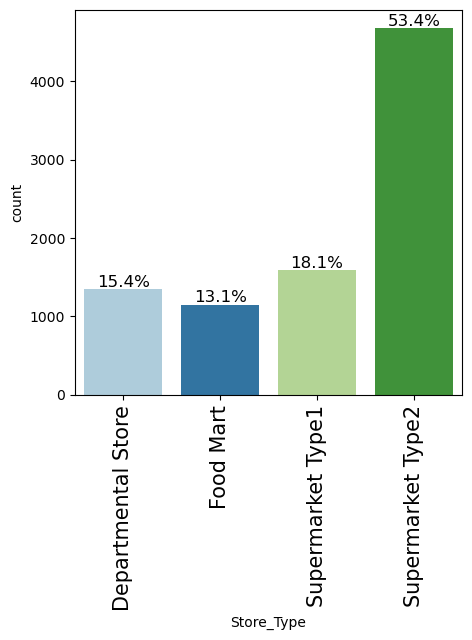

In [54]:
# Plot the labelled barplot for 'Store_Type'
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**
* Around 53% of the products have been sold from stores that are Supermarket Type2.

### **Bivariate Analysis**

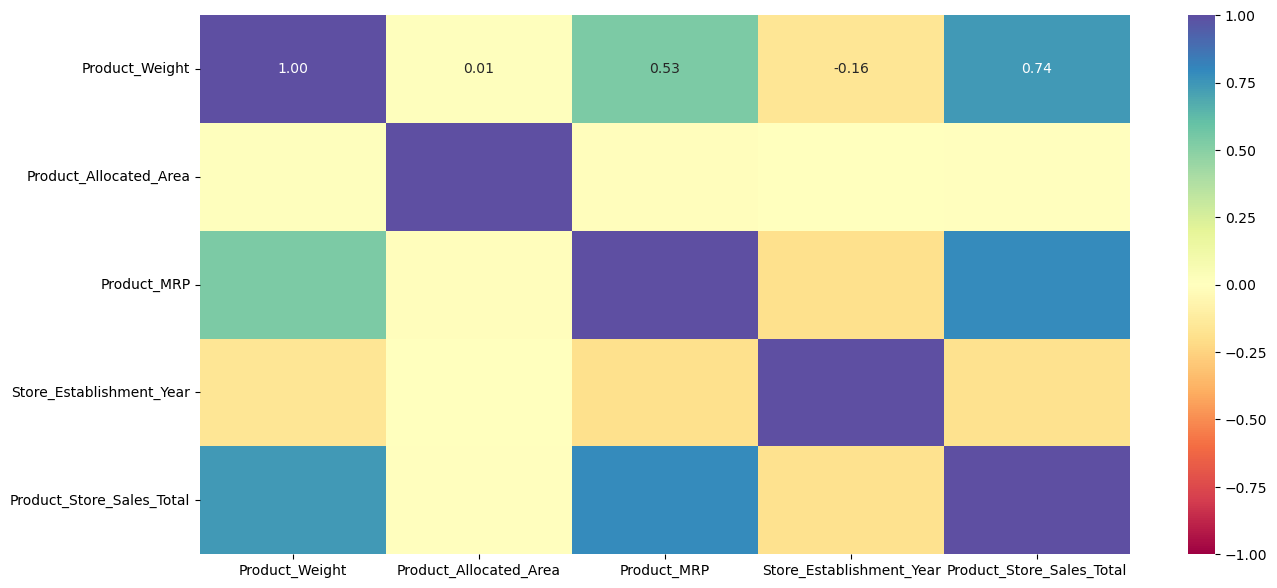

In [56]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations:**
* Product weight and product MRP are highly correlated with our target variable i.e Product_Store_Sales_Total.
* Product weight and product MRP are moderately correlated with each other.
* There is not much correlation among the rest of the variables.
* Store_Establishment_Year is highly negatively correlated with our target variable i.e Product_Store_Sales_Total.

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

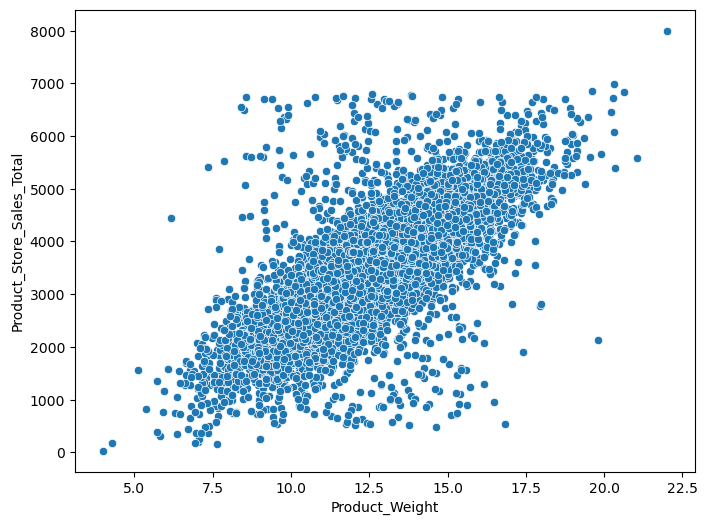

In [57]:
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)

plt.show()

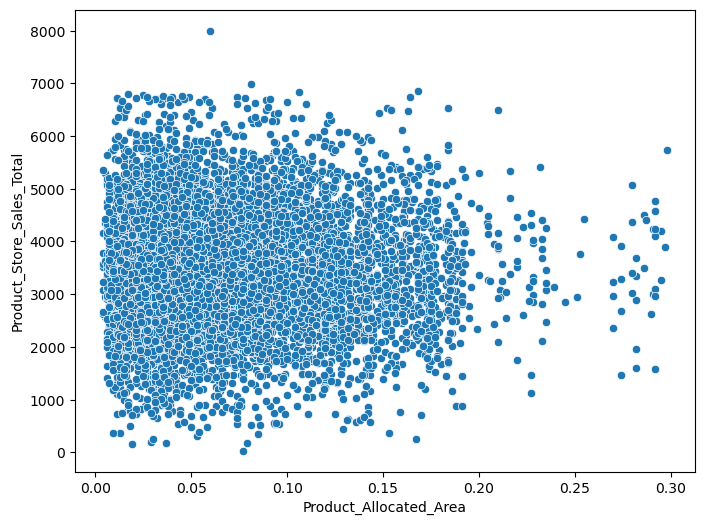

In [59]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observations:**
* There is likely no relation between Product_Allocated_Area and Product_Store_Sales_Total

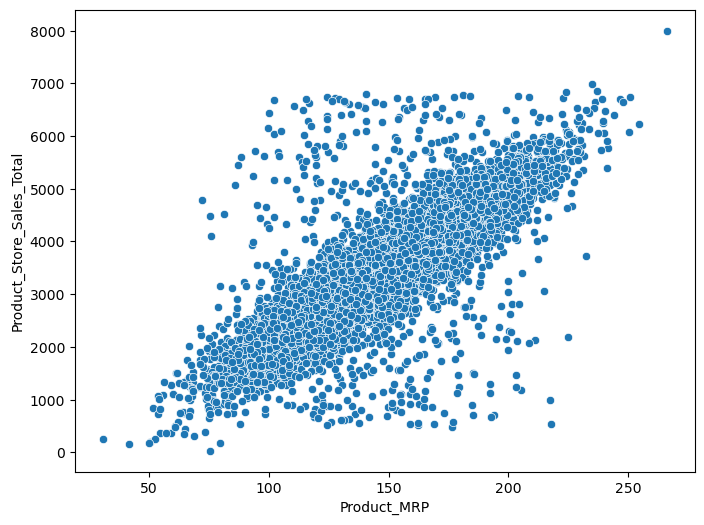

In [60]:
# Plot the scatterplot of Product_MRP against Product_Store_Sales_Total 
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

**Observations:**
* Product MRP and Product_Store_Sales_Total are almost linearly correlated with each other.

**Let us see from which product type the company is generating most of the revenue**

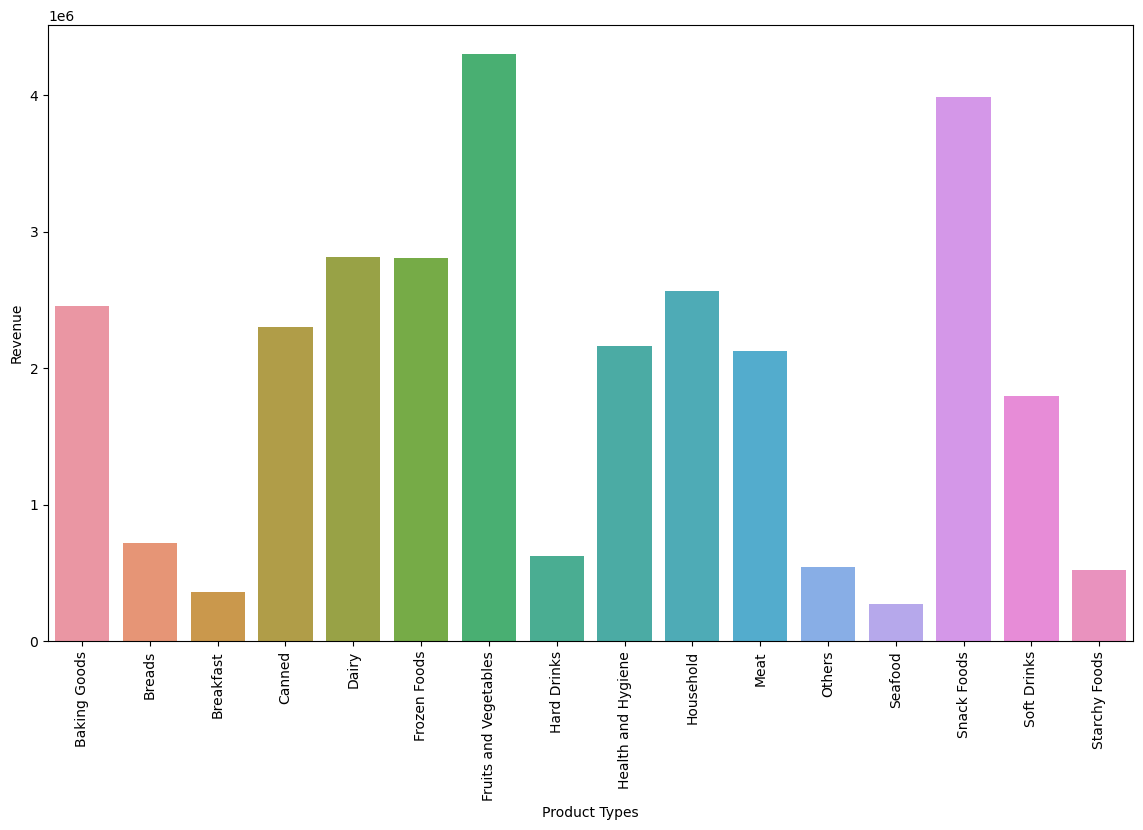

In [61]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plt.figure(figsize = [14, 8])

plt.xticks(rotation = 90)

a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)

a.set_xlabel("Product Types")

a.set_ylabel("Revenue")

plt.show()

**Product_Sugar_Content**

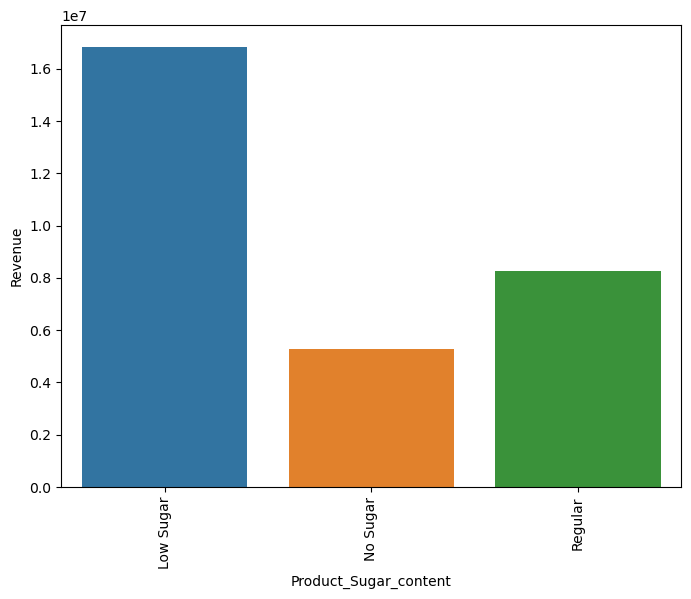

In [62]:
# Plot the barplot to see how much Product_Sugar_Content is generating the revenue
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
b = sns.barplot(
    x = df_revenue2.Product_Sugar_Content, y = df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.show()

**Observations:**
* Low sugar content materials are the biggest contributors to the revenue.
* No sugar content materials are the lowest contributors to the revenue.

**Let us see from which type of stores and locations the revenue generation is more**

**Store_Id**

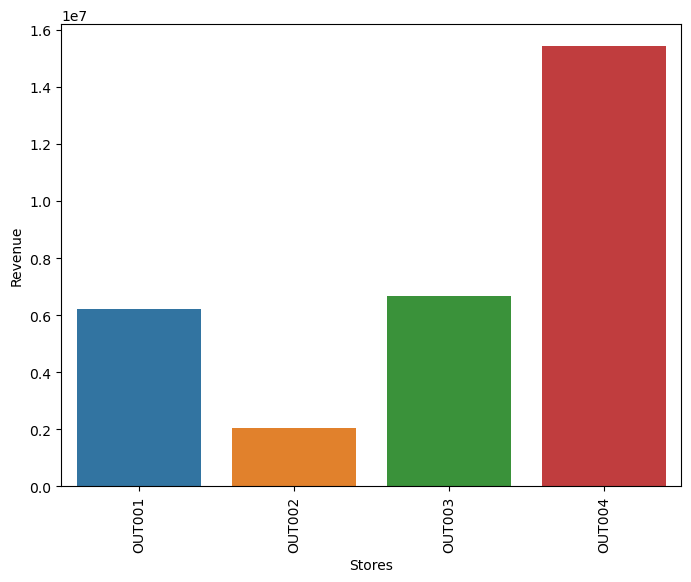

In [64]:
# Plot the barplot to see how much Store_Id is generating the revenue
df_store_revenue = data.groupby(["Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
r = sns.barplot(
    x = df_store_revenue.Store_Id, y = df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

**Observations:**
* OUTOO4 is contributing the most to the revenue which is more than double the contribution being made by second-placed store OUT003.
* OUT002 is contributing the least to the revenue which is two times less than OUT001 and OUT003.

**Store_Size**

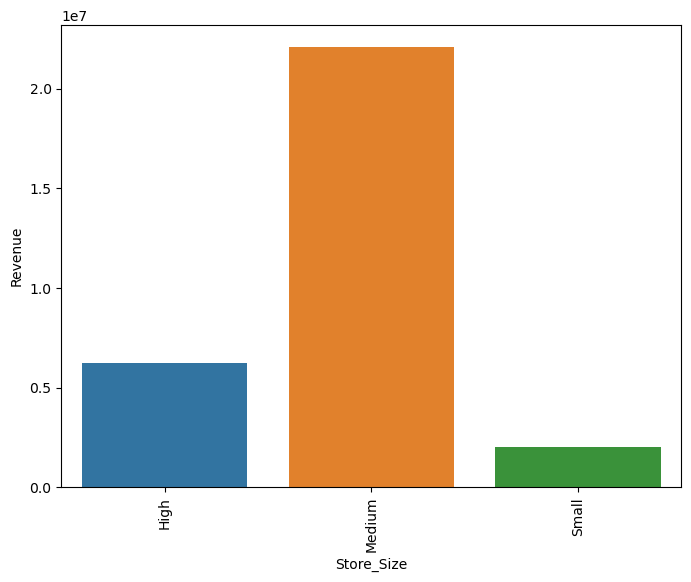

In [65]:
# Plot the barplot to see how much Store_Size is generating the revenue
df_revenue3 = data.groupby(["Store_Size"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
c = sns.barplot(x = df_revenue3.Store_Size, y = df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

**Observations:**
* The medium-sized stores are contributing heavily to the revenue.
* The high-sized stores are contributing the least to the revenue.

**Store_Location_City_Type**

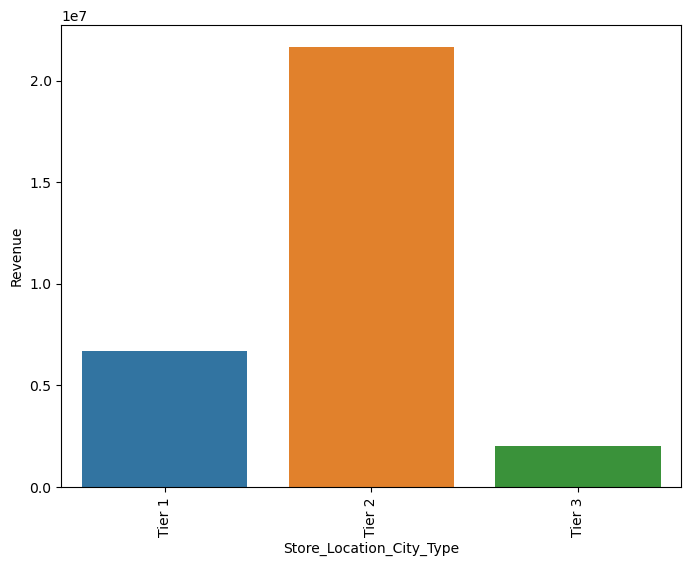

In [66]:
# Plot the barplot to see how much Store_Location_City_Type is generating the revenue
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
d = sns.barplot(
    x = df_revenue4.Store_Location_City_Type, y = df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

**Observations:**
* Stores in the Tier 2 cities are contributing the most to the revenue.
* Stores in the Tier 3 cities are contributing the least to the revenue.

**Store_Type**

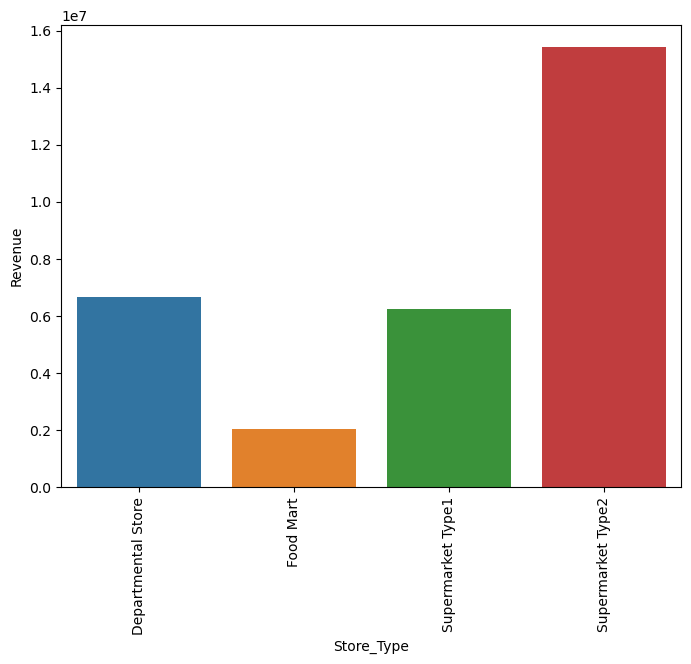

In [67]:
# Plot the barplot to see how much Store_Type is generating the revenue
df_revenue5 = data.groupby(["Store_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
e = sns.barplot(x=df_revenue5.Store_Type, y = df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

**Observations:**
* Stores of Supermarket Type 2 are performing exceptionally well.
* Stores of SuperKart Type 1 and Departmental Store are almost contributing the same revenue to the company.

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

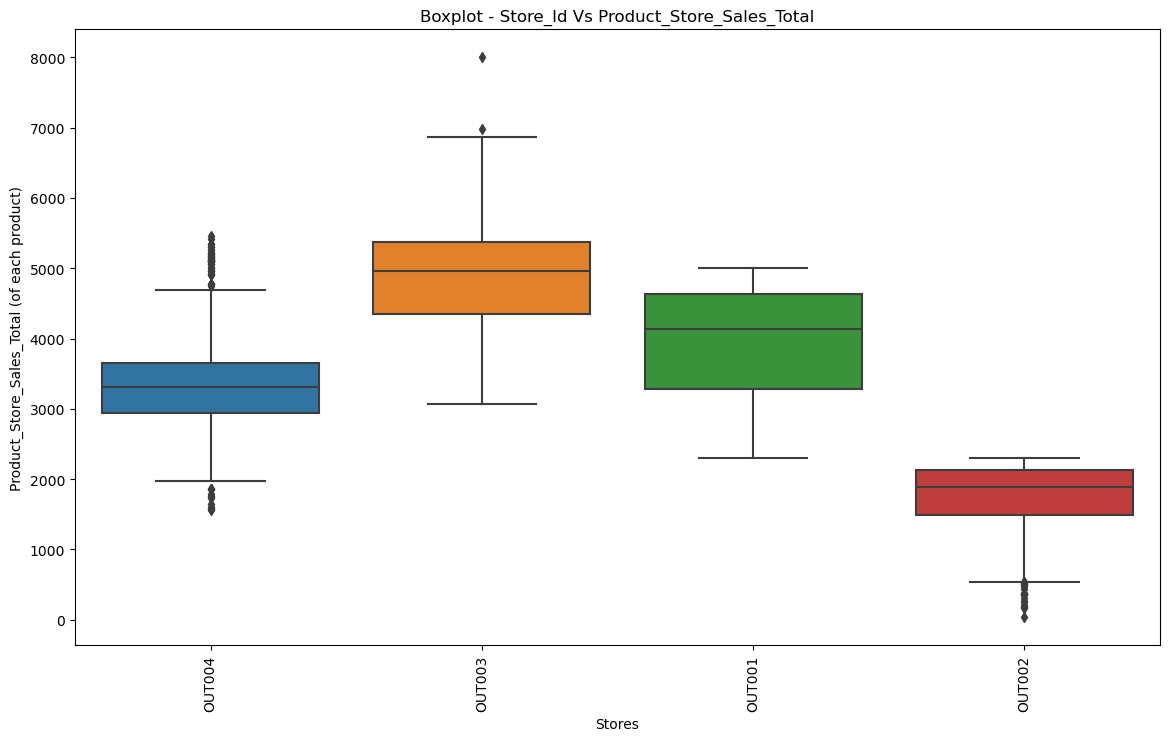

In [68]:
plt.figure(figsize = [14, 8])

sns.boxplot(data = data, x = data.Store_Id, y = data.Product_Store_Sales_Total)

plt.xticks(rotation = 90)

plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")

plt.xlabel("Stores")

plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()

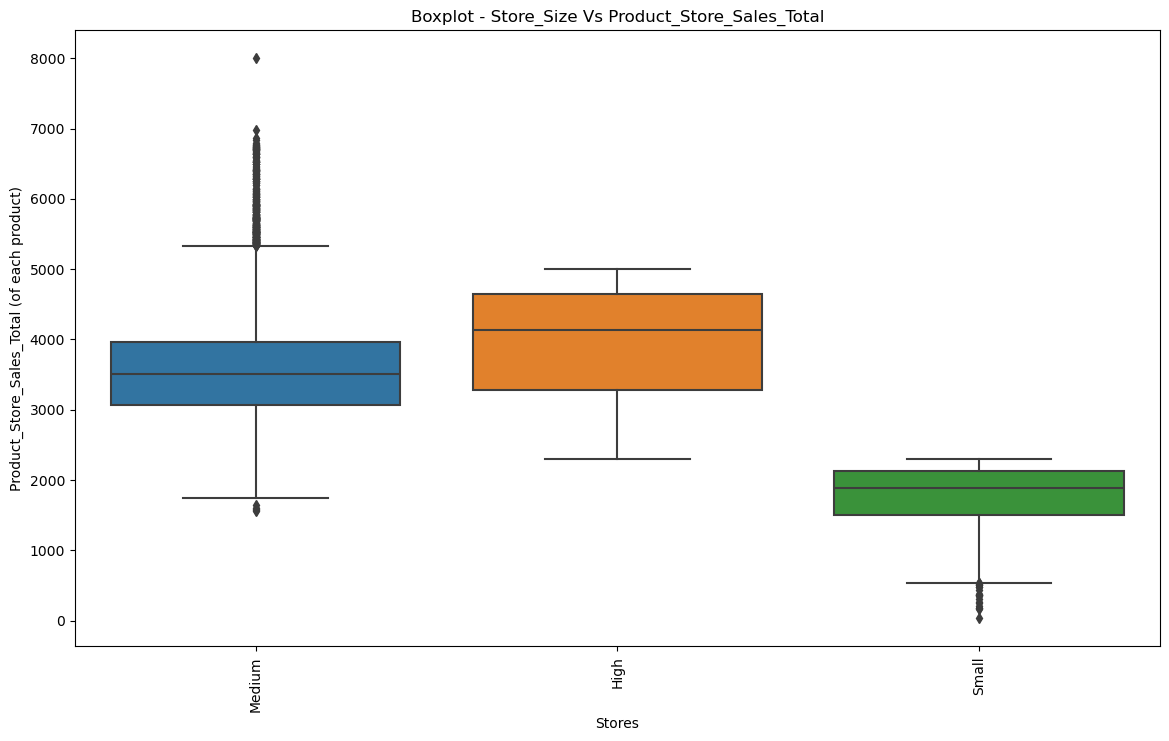

In [69]:
# Plot the boxplot of Store size against Product_Store_Sales_Total 
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Size, y = data.Product_Store_Sales_Total)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

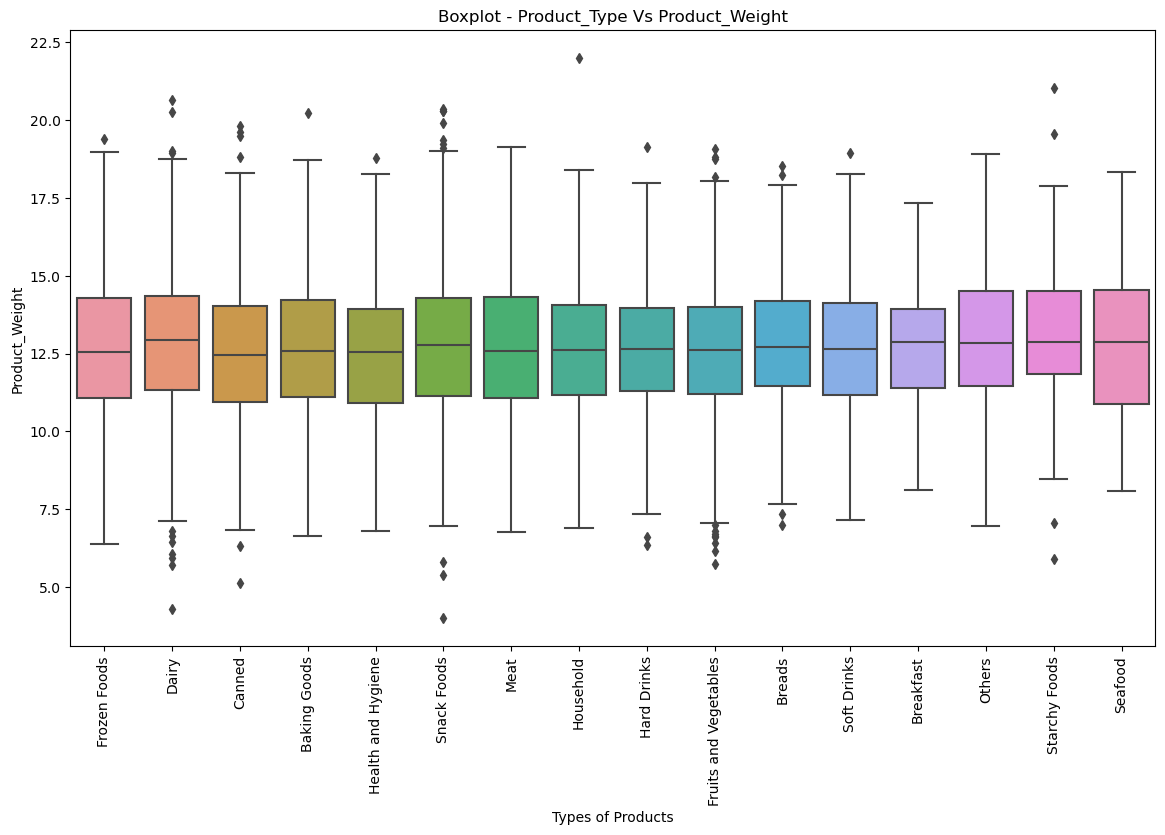

In [70]:
# Plot the boxplot of Product_Type against Product_Weight 
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Product_Type, y = data.Product_Weight)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.show()

**Observations:**
* The median weight of all the product types is almost equal. Each product type contains different items whose weight ranges from low to high, therefore the overall weight of the product category gets averaged out.

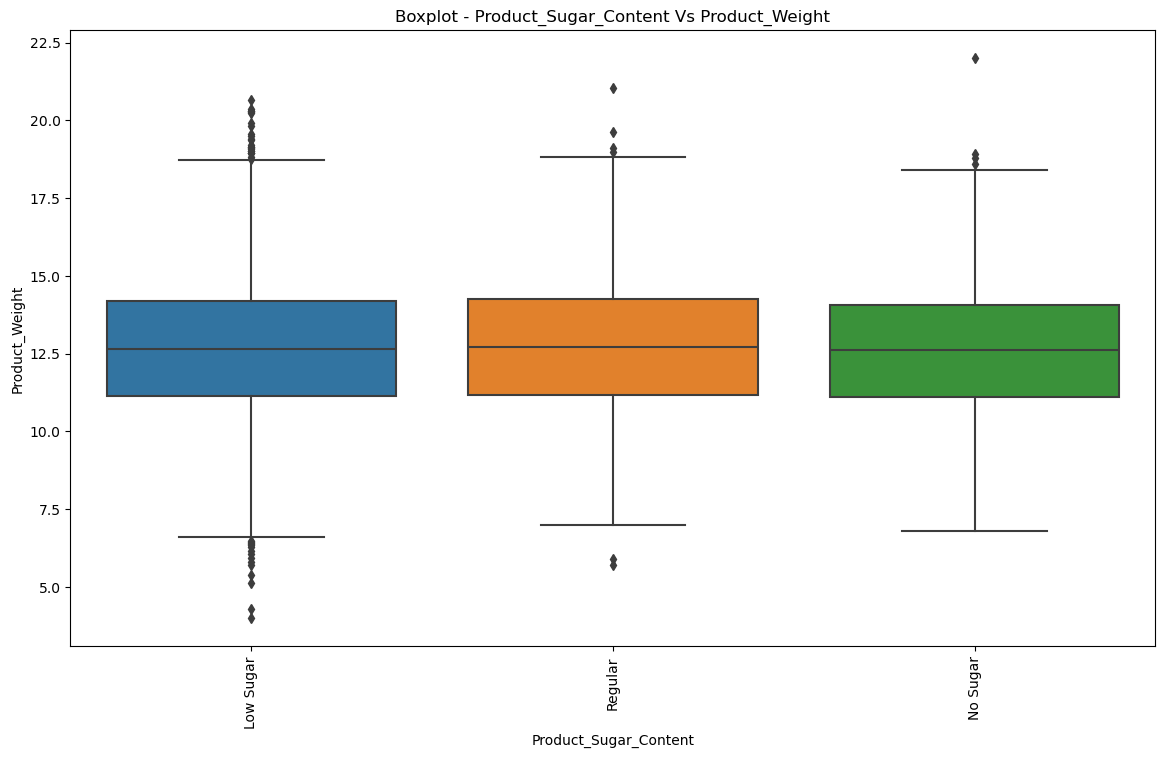

In [71]:
# Plot the box plot of Product_Sugar_Content against Product_Weight 
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Product_Sugar_Content, y = data.Product_Weight)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")
plt.show()

**Observations:**
* The median weight of all the products across the 3 categories is almost the same.

**Let's analyze the sugar content of different product types**

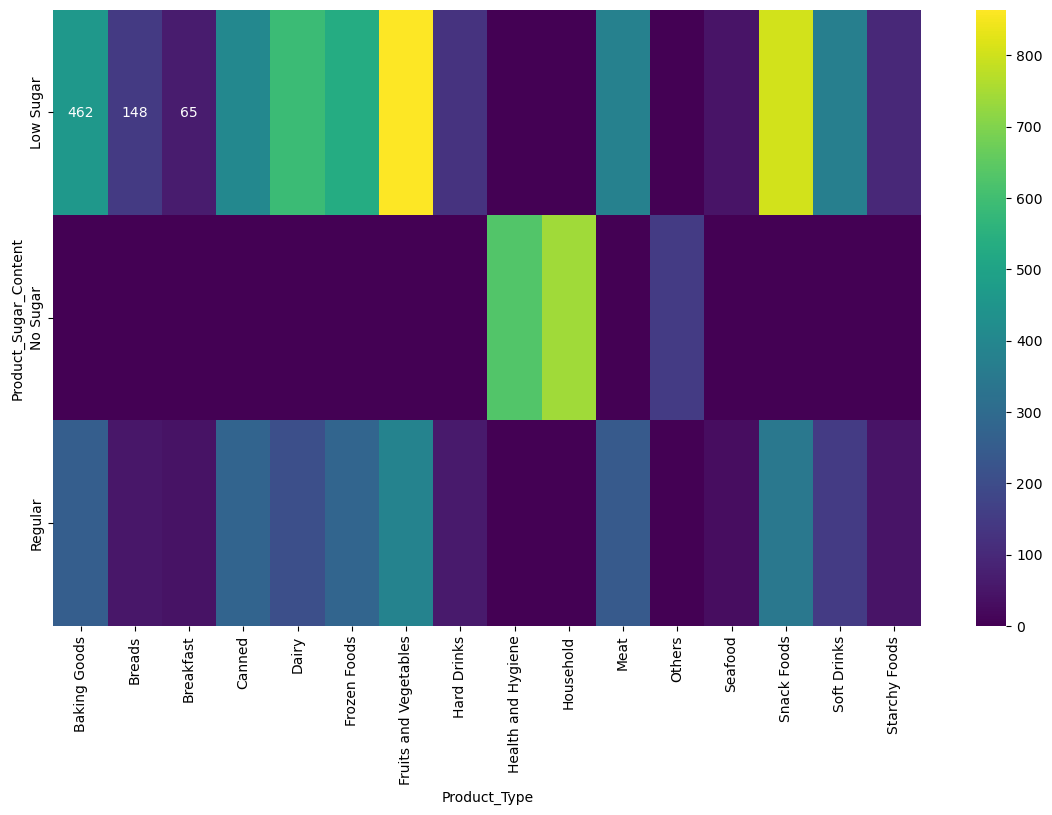

In [72]:
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

#### Let's find out how many items of each product type has been sold in each of the stores

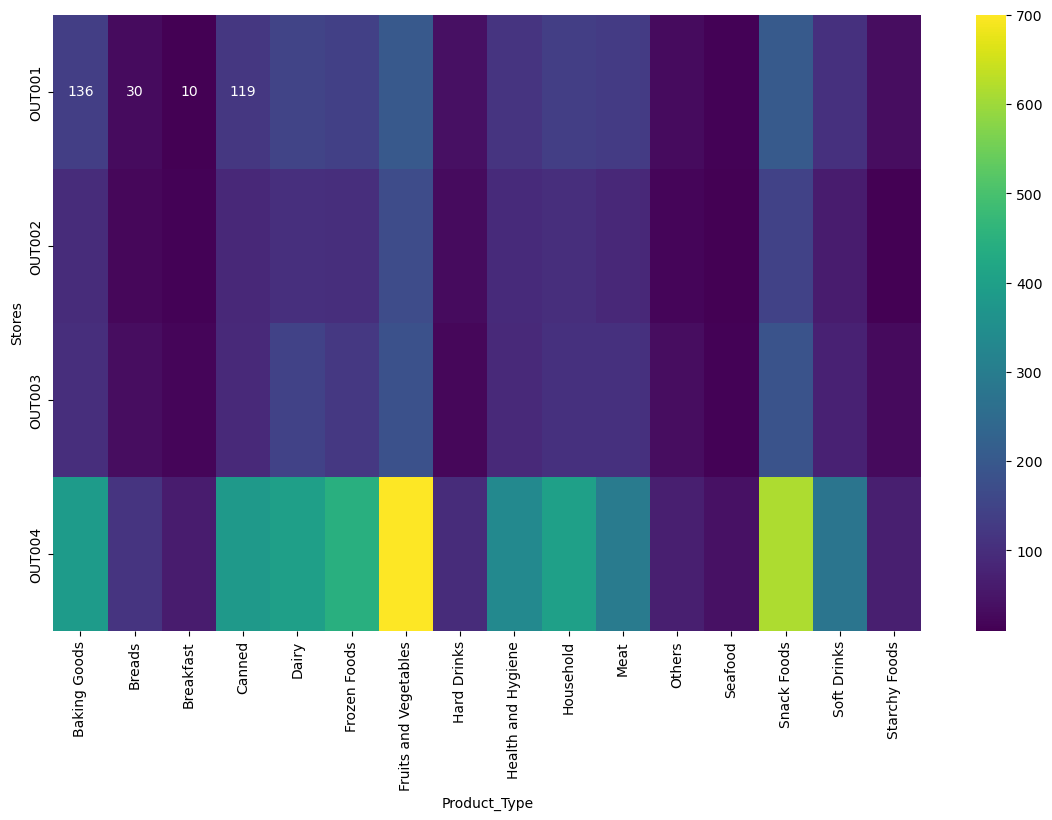

In [73]:
# Plot heatmap with and Product_Type as x and Store_Ids as y
plt.figure(figsize = (14, 8))
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),
    annot = True,
    fmt = "g",
    cmap = "viridis",
)
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.show()

**Observations:**
* Fruits and vegetables have been sold the most across all the stores followed by snack foods.
* Seafood is the least bought product type across all the stores.

#### Different product types have different prices. Let's analyze the trend

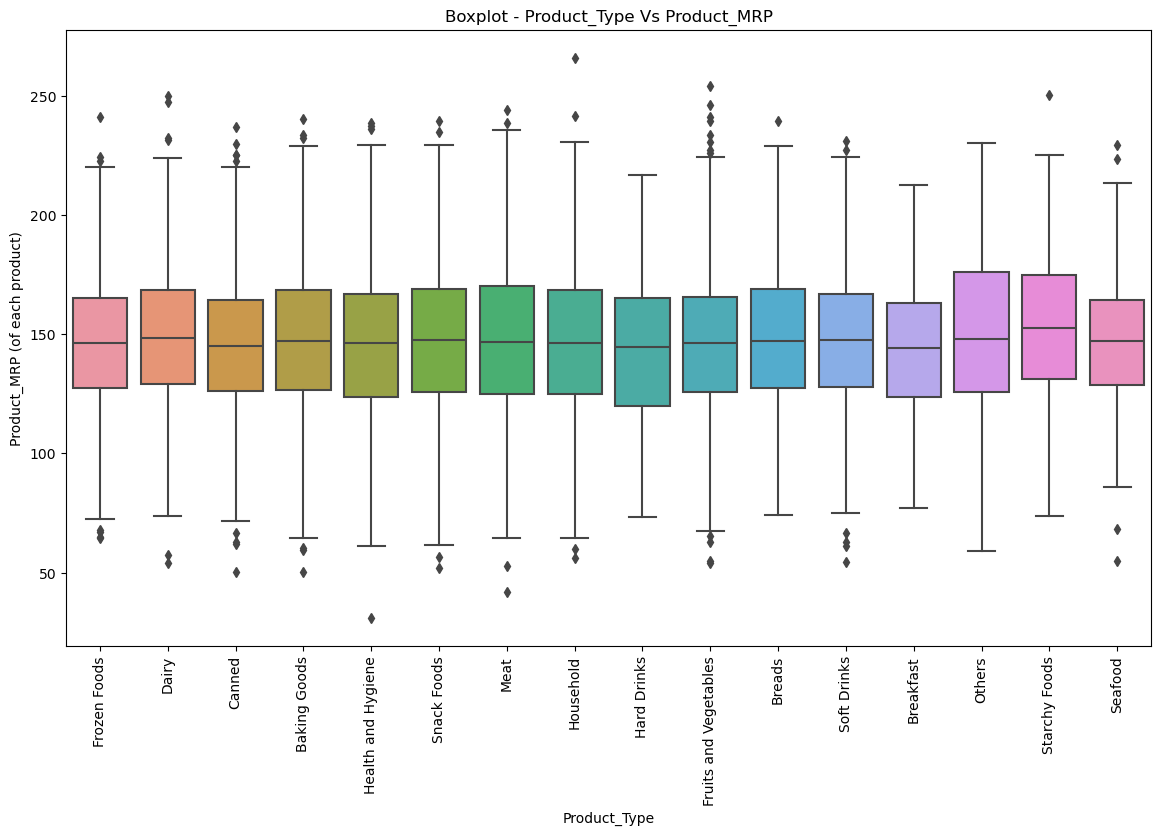

In [74]:
# Plot a box plot of Product_Type against Product_MRP
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Product_Type, y = data.Product_MRP)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Observations:**
* The median MRPs of all the product types are almost equal. Each product type contains different items whose price ranges from low to high, therefore, the overall MRP of the product category gets averaged out.

#### Let's find out how the Product_MRP varies with the different stores

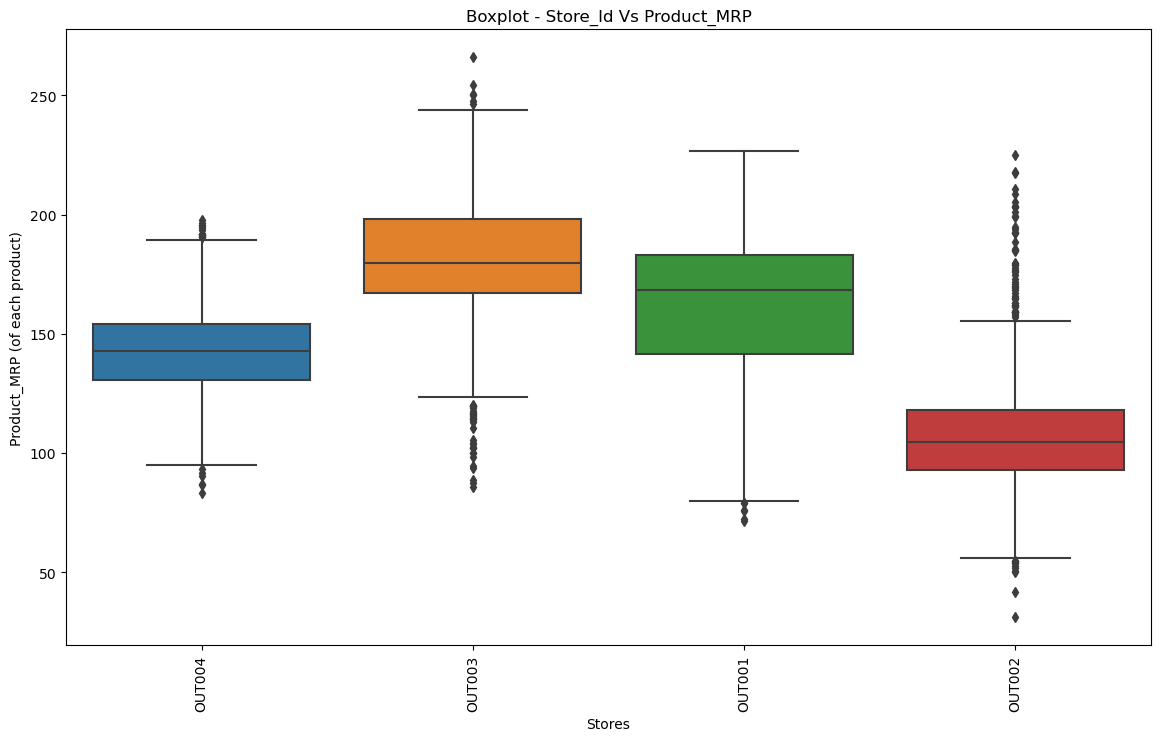

In [75]:
# Plot a box plot of box plot of Store_Id against Product_MRP
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Id, y = data.Product_MRP)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Observations:**
* As we have seen earlier OUT003, being a premium store, has more costly items than the rest of the stores.

**Let's delve deeper and do a detailed analysis of each of the stores**

**OUT001**

In [76]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

In [78]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

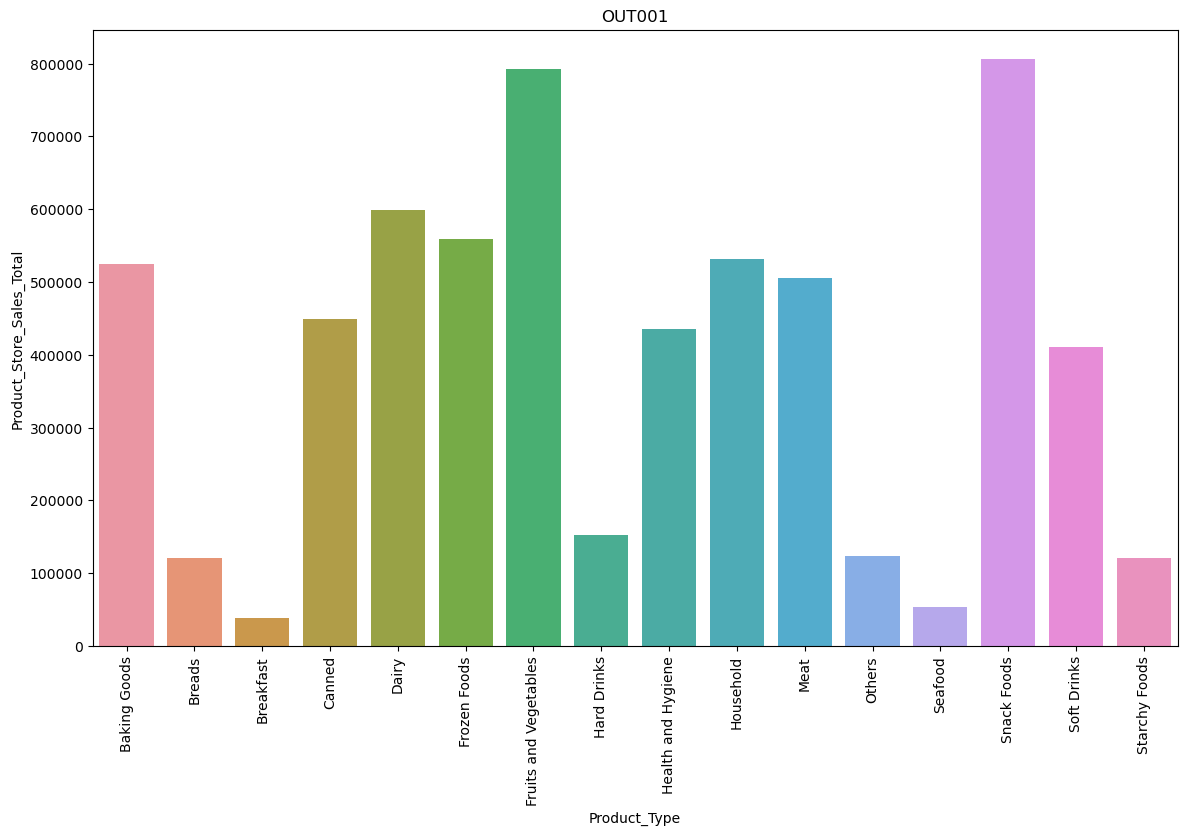

In [79]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

**Observations:**
* OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories have contributed around 800000 each.
* OUT001 has generated the lowest revenue from the sale of breakfast and seafood. Both the categories have contributed 500000 each.


**OUT002**

In [80]:
# Print the statistical summary where Store_Id is OUT002
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,3,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Print the total revenue from the OUT002 Store_Id 
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

2030909.72

In [82]:
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

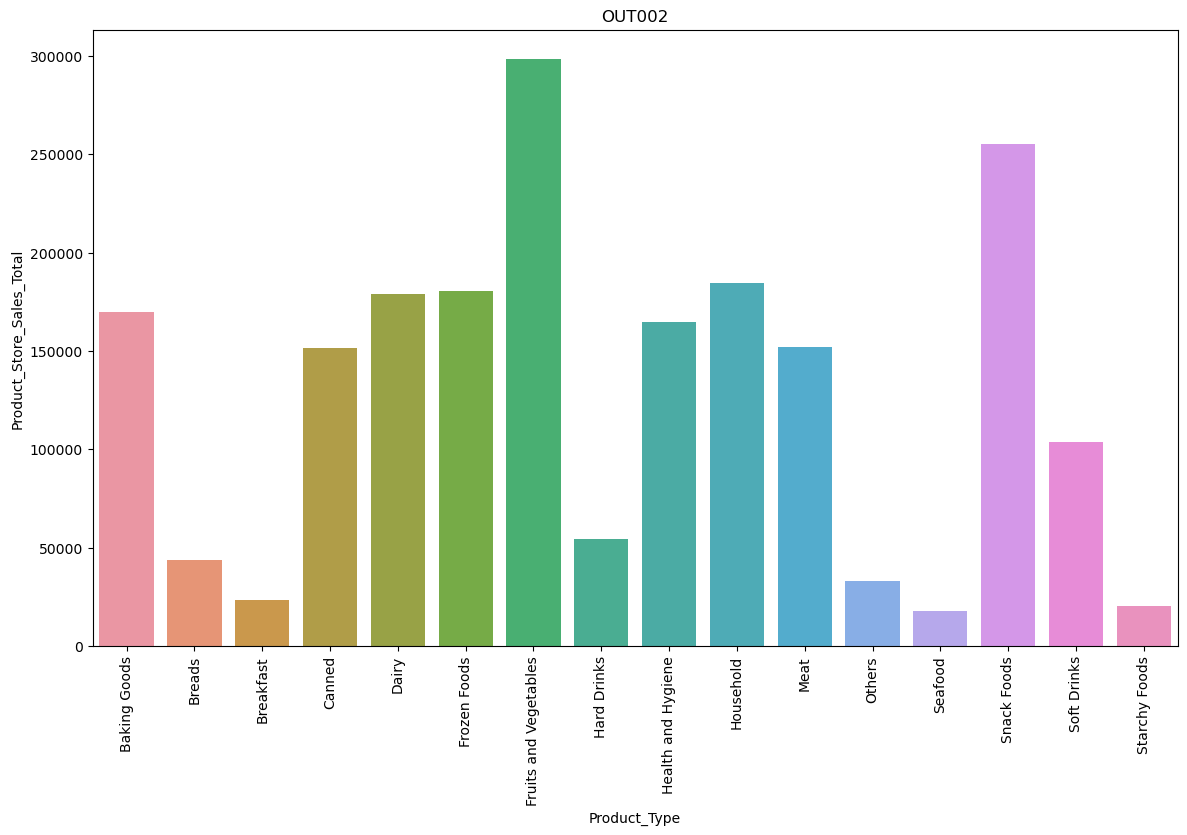

In [83]:
# Plot the barplot for Product_Type from df_OUT002 against Product_Store_Sales_Total
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x = df_OUT002.Product_Type, y = df_OUT002.Product_Store_Sales_Total)
plt.show()

**Observations:**
* OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).
* OUT002 has generated the lowest revenue from the sale of seafood and starchy foods followed by breakfast.

**OUT003**

In [84]:
# Print the statistical summary where Store_Id is OUT003
data.loc[data["Store_Id"] == "OUT003"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,3,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Print the total revenue from the OUT003 Store_Id 
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

6673457.57

In [88]:
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

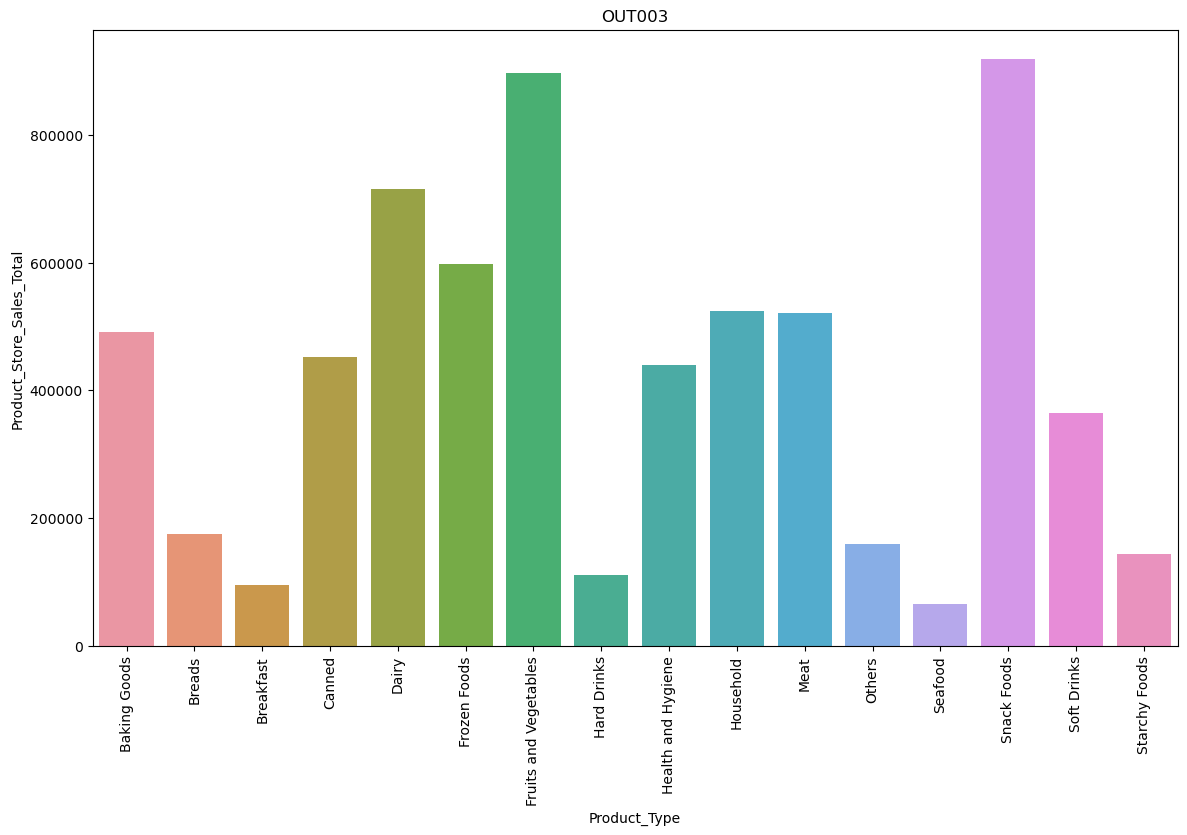

In [89]:
# Plot the barplot for Product_Type from df_OUT003 against Product_Store_Sales_Total
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x = df_OUT003.Product_Type, y = df_OUT003.Product_Store_Sales_Total)
plt.show()

**Observations:**
* OUT003 has generated the highest revenue from the sale of snack foods followed by fruits and vegetables, both categories contributing around 800000 each.

**OUT004**

In [90]:
# Print the statistical summary where Store_Id is OUT004
data.loc[data["Store_Id"] == "OUT004"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,3,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Print the total revenue from the OUT004 Store_Id 
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

15427583.43

In [92]:
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

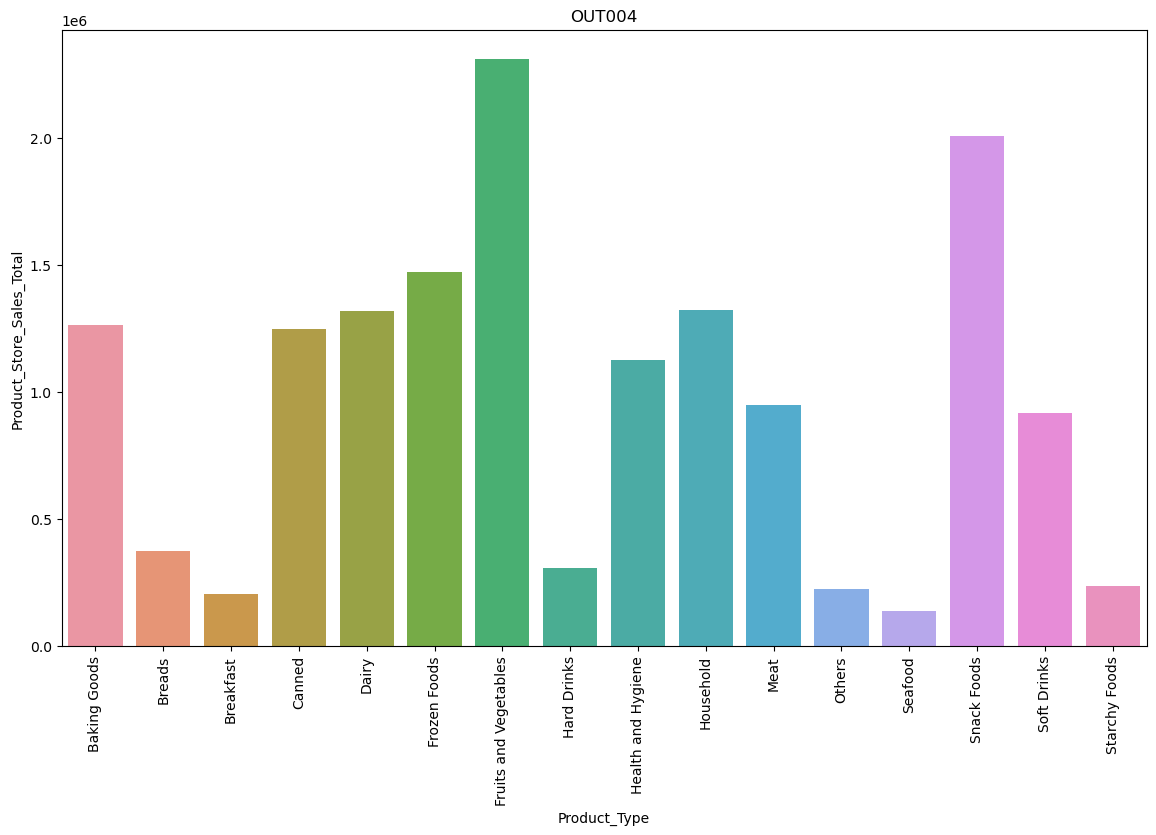

In [93]:
# Plot the barplot for Product_Type from df_OUT004 against Product_Store_Sales_Total
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x = df_OUT004.Product_Type, y = df_OUT004.Product_Store_Sales_Total)
plt.show()

**Observations:**
* OUT004 has generated the highest revenue from the sale of fruits and vegetables (~ 2500000) followed by snack foods (~ 2000000).

#### Let's find out the revenue generated by the stores from each of the product types

In [98]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


**Observations:_____**

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [99]:
df2 = data.groupby(["Product_Sugar_Content", "Store_Id"], as_index = False)["Product_Store_Sales_Total"].sum() # Fill in the blanks to find the revenue generated by each store for the different sugar content level items 
df2

,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1831924.47
9,Regular,OUT002,491988.68


**Observations:**
* The trend is the same as that which was present in the revenue analysis of stores for product types.

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [100]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data.Store_Establishment_Year # Fill in the blank and use Store_Establishment_Year to extract the present store age

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [101]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [102]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [103]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [104]:
data["Product_Type_Category"] = pd.Series(change1) # Fill in the blank and use change1 to create a new column

In [105]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,22,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,34,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,34,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,23,Non Perishables


### **Outlier Check**

- Let's check for outliers in the data.

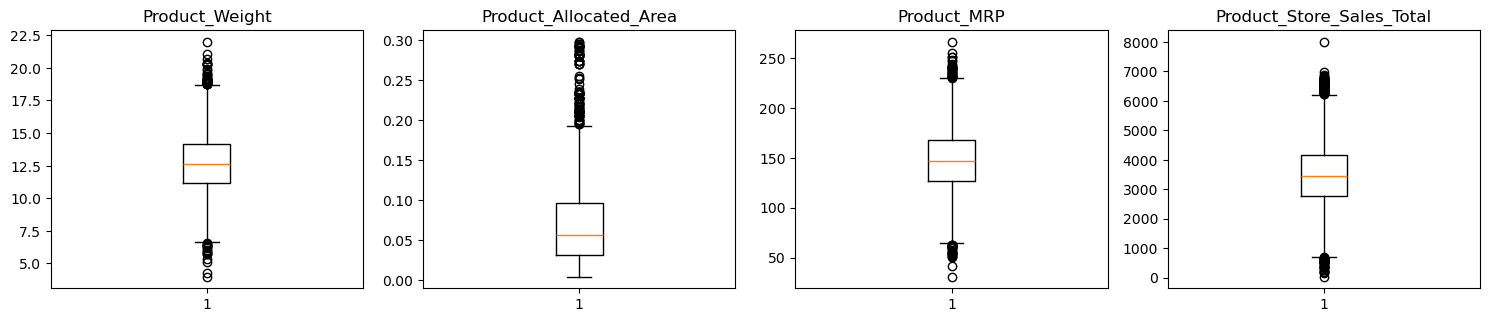

In [106]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* There are quite a few outliers in the data.

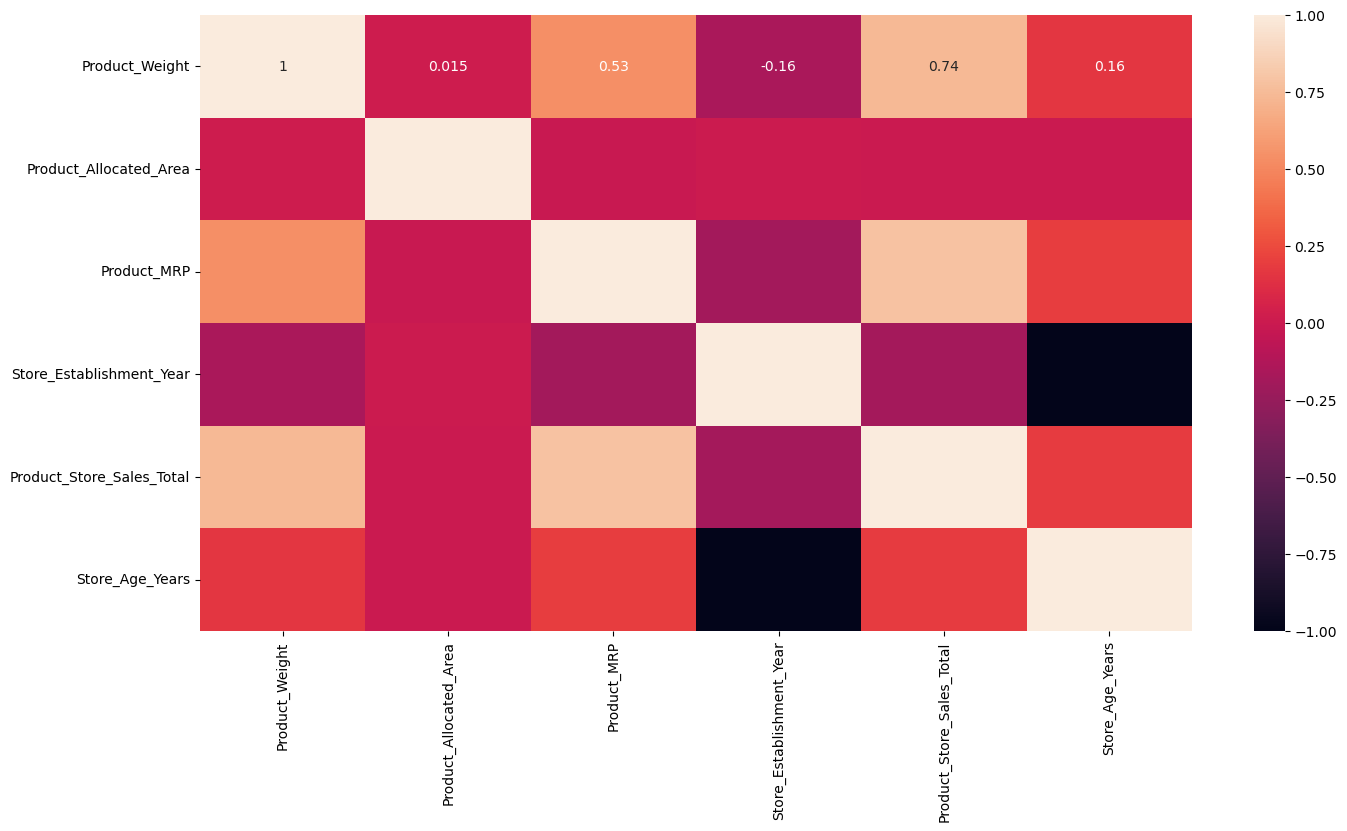

In [108]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(numeric_only = True), annot = True)
plt.show()

**Observations:**
* We observe the high correlation between the two variables Store_Size_Medium and Store_Type_Supermarket with respect to Store_Age_Years.

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [109]:
# Drop the "Product_Type", "Store_Id", "Store_Establishment_Year" variables from the data
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [110]:
# Apply get_dummies on the dataframe data
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [111]:
# Separating features and the target column

X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [112]:
X = sm.add_constant(X)

In [113]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [116]:
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train1))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.088506
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.774371
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217690


In [117]:
X_train1 = X_train1.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train1))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.088506
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.774371
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217690


**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [119]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [120]:
# Create the OLS model and fit it
X_train1 = X_train1.astype(float)
y_train1 = y_train.astype(float)
model1 = sm.OLS(y_train1, X_train1).fit()

In [123]:
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                               15:54:10   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               176.6077     42.659      4.140      0.000      92.982     260.234
Product_Weight                      135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area             -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                          12.8696      0.254     50.702      0.000      12.372      13.367
Product_Sugar_Content_No Sugar       16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular        30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                   394.3947     26.547     14.856      0.000     342.353     446.436
Store_Size_Small                   -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Location_City_Type_Tier 2    -308.1516      8.855    -34.801      0.000    -325.510    -290.794
Store_Location_City_Type_Tier 3    -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Food Mart               -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Supermarket Type1        165.3861     17.762      9.311      0.000     130.566     200.206
Store_Type_Supermarket Type2       -473.5378     17.176    -27.570      0.000    -507.208    -439.867
Product_Id_char_FD                    0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                   16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishables     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     3.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
# Checking model1 performance
model_pref(model1, X_train1, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
* The Train and the Test scores are very close to each other so we can say the model is not overfitting.
* However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [125]:
X_train1 = X_train1.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1) # Please drop the insiginificant variables from the X_train 


In [126]:
X_test1 = X_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1) # Please drop the insiginificant variables from the X_test

In [127]:
# Create the OLS model and fit it
X_train1 = X_train1.astype(float)
y_train1 = y_train.astype(float)

model2 = sm.OLS(y_train, X_train1).fit()

In [128]:
# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3576.
Date:                       Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                               15:56:38   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6125   BIC:                         9.234e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             179.0666     40.949      4.373      0.000      98.793     259.340
Product_Weight                    135.0918      3.435     39.323      0.000     128.357     141.827
Product_Allocated_Area           -140.3752    118.852     -1.181      0.238    -373.367      92.616
Product_MRP                        12.8703      0.254     50.727      0.000      12.373      13.368
Product_Sugar_Content_No Sugar     14.1944      7.933      1.789      0.074      -1.358      29.747
Product_Sugar_Content_Regular      30.7219     13.272      2.315      0.021       4.704      56.740
Store_Size_Medium                 395.6741     25.835     15.316      0.000     345.029     446.319
Store_Size_Small                 -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Location_City_Type_Tier 2  -307.8490      8.636    -35.648      0.000    -324.778    -290.920
Store_Location_City_Type_Tier 3  -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Food Mart             -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Supermarket Type1      166.1521     17.353      9.575      0.000     132.135     200.169
Store_Type_Supermarket Type2     -474.0011     17.074    -27.762      0.000    -507.472    -440.530
Product_Id_char_NC                 14.1944      7.933      1.789      0.074      -1.358      29.747
==============================================================================
Omnibus:                     1744.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46526.548
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.403   Cond. No.                     8.24e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [129]:
# Checking model2 performance
model_pref(model2, X_train1, X_test1)

    Data        RMSE         MAE        r2
0  Train  446.681336  262.125308  0.785911
1   Test  446.780252  266.790089  0.790113


**Observations:**
* The train and the test scores are very close to each other. So, we can say the model is not overfitting.
* However, the test score is slightly better than the training score. So, we might be able to get better performance if we increase the complexity of the model.
* So, model2 is performing the best when compared with model1 because in model2 we are dropping insignificant variables.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [131]:
residuals = model2.resid

np.mean(residuals)

-8.387397504057875e-12

**Observations:**
* The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [132]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [136]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9832189770563926), ('p-value', 0.6800664494251448)]

**Observations:**
* Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

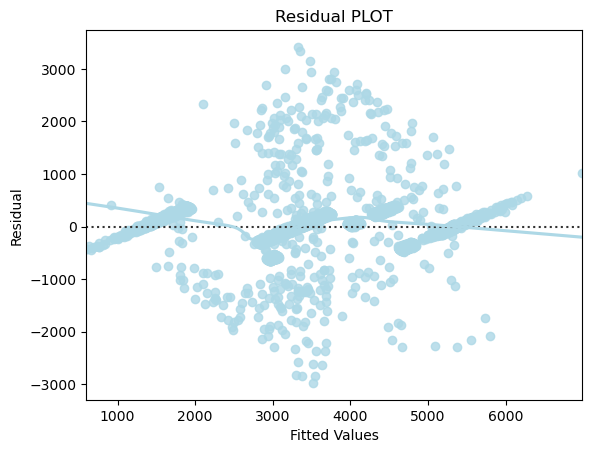

In [137]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**
* There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

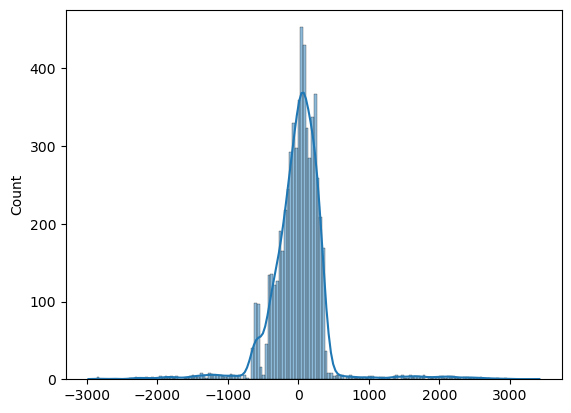

In [138]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Write your code here

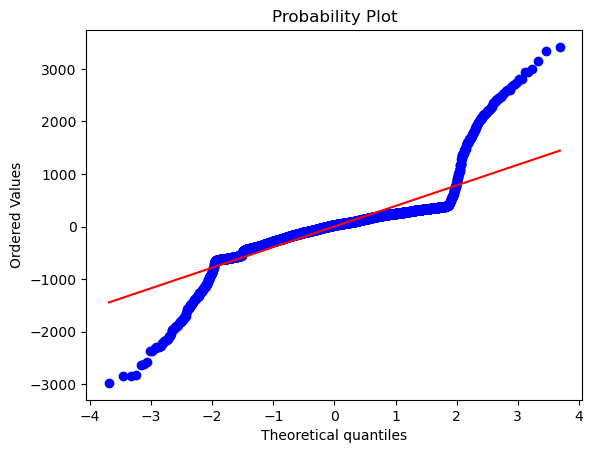

In [139]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**
* From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [140]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
* After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## **Actionable Insights and Business Recommendations**

* We can use this prediction model to predict the total sales that will be done by SuperKart in the next quarter.
*
- The model explains around 79% of the variation in the data.*

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reac*.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expans*on.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more cust*mers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be ta*getted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better *nsights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies acco*ding to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.